## Project 1

- ### Release Date: Monday, March 16
- ### Due Date: Monday April 6, 12:00 PM

### Introduction

In this project, we will work with social media data to analyze politics. Along the way, we want to learn more about [data-driven journalism](https://en.wikipedia.org/wiki/Data-driven_journalism) where journalists use datasets for reporting. Journalists will locate information, filter and transform tables, generate charts and perform investigations for news outlets.

We want to gain insights into politics through data. We will try to reproduce some of the findings from [Buzzfeed](https://www.buzzfeednews.com/article/peteraldhous/trump-twitter-wars) on the usage of Twitter by the president. Note that the journalists have provided [supporting details](https://buzzfeednews.github.io/2018-01-trump-twitter-wars/) of their analyses alongside the article. 

As we explore the data, we want to gain practice with:
* Searching for patterns of characters in strings  
* Working with data in nested formats instead of tabular formats
* Handling dates and times

We will guide you through the problems step by step. However, we encourage you to discuss with us in Office Hours and on Piazza so that we can work together through these steps. 

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file', embed = True)` to embed it.
- You should not display large output cells such as all rows of a table. 

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Name:** Richie Doherty

**NetId:** rd2414

**Collaborators:** Madi Perez

#### Rubric

Question | Points
--- | ---
Gradescope | 2 
1a | 1
1b | 1
1c | 2
2a | 2
2b | 1
2c | 1
2d | 1
2e | 1
3a | 1
3b | 1
3c | 1
3d | 1
3e | 1
3f | 1
4a | 1
4b | 2
Total | 21

In [1]:
import pandas as pd
import numpy as np

import re
import datetime
import json

import dsua_112_utils

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set some parameters in the packages 
%matplotlib inline

sns.set(font_scale=1.5)

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

# Some packages to help with configuration
import os, sys, pathlib, pickle
from IPython.display import Image

In [2]:
home_path = os.environ["HOME"]
data_path_recent = f'{home_path}/shared/Project1/data/trump_tweets_recent.json' 
data_path_old_1 = f'{home_path}/shared/Project1/data/old_trump_tweets_1.json'
data_path_old_2 = f'{home_path}/shared/Project1/data/old_trump_tweets_2.json'
img_path = f'{home_path}/shared/Project1/images'
lexicon_path = f'{home_path}/shared/Project1/vader_lexicon.txt'

In [3]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()
assert 'datetime' in sys.modules 
assert "home_path" in locals()

### 1. Loading Twitter Data


Donald Trump has made frequent use of Twitter. We want to focus on activity linked to his Twitter handle `realdonaldtrump`. After we access the data, we can try to understand the scope and temporality of the posts.

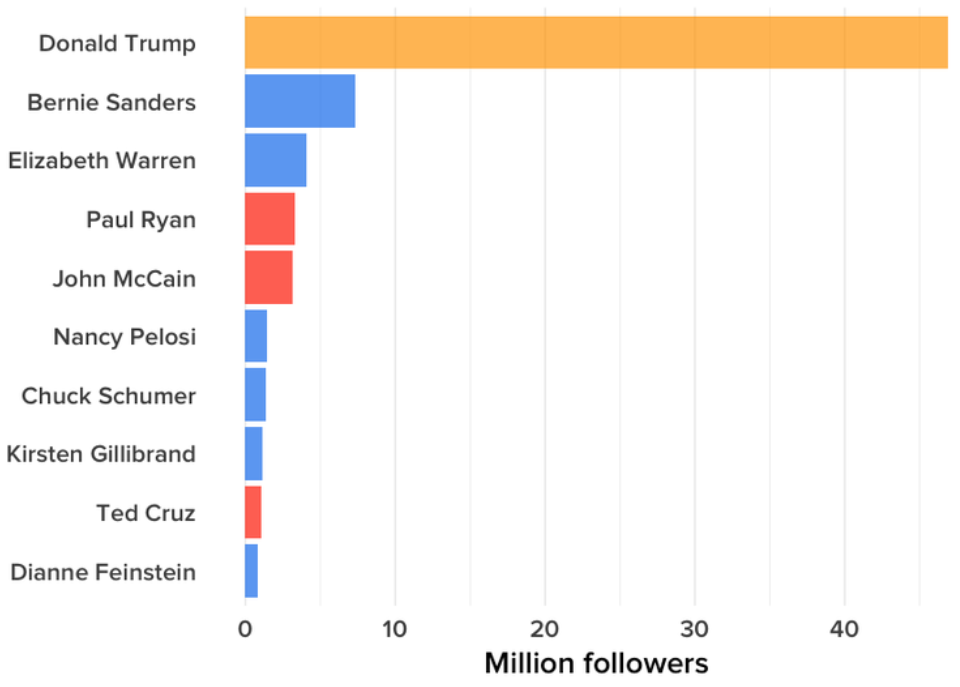

In [4]:
Image(filename=img_path + '/usage.PNG', embed=True, width=750)

### Question 1a

Recall from Section 7 that Twitter provides an Application Programming Interface (API) for developers. We can access the API with the `tweepy` package. With Twitter credentials we can collect data from the platform in the Javascript Object Notation (JSON) format. 

In [5]:
# Run to load the data

with open(data_path_recent) as f: 
    trump_tweets = json.load(f)

We have collected the last 2000 tweets from `realdonaldtrump` into `trump_tweets_recent.json`. We can load files in the JSON format with the `json` package. Remember that the JSON format is a nested format not a tabular format. Instead of rows and columns, we have keys and values resembling a dictionary. 

In [6]:
# TEST 

assert 2000 <= len(trump_tweets) <= 3000

Here we have a list of dictionaries. Each dictionary corresponds to a post. 

Note that Twitter limits the usages of its API. We will see in Question 2e that the data contains gaps stemming from restrictions on access. Since we cannot collect all post from Twitter, we need to combine with historical data stored in separate files. 

Before we link these records, we want to study `trump_tweets`. In particular, what is the oldest tweet in  `trump_tweets`. We have the following keys for each posts 

In [7]:
list(trump_tweets[0].keys())

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'lang']

The key `created_at` corresponds to the date, time and timezone for the post. Create a list consisting of the values for `created_at` for each of the entries in the `trump_tweets`. Use the `pandas` function `to_datetime` to convert the list into a `DatetimeIndex`. See Lab 7 for more information about storing dates and times.

In [8]:

list_datetime = []
for i in range(len(trump_tweets)):
    list_datetime.append(trump_tweets[i]['created_at'])


# YOUR CODE HERE
#raise NotImplementedError()

index_datetime = pd.to_datetime(list_datetime, utc = True)
# YOUR CODE HERE
#raise NotImplementedError()
index_datetime

DatetimeIndex(['2020-03-06 05:21:26+00:00', '2020-03-06 05:19:02+00:00',
               '2020-03-06 05:17:33+00:00', '2020-03-06 05:15:37+00:00',
               '2020-03-06 05:14:36+00:00', '2020-03-06 05:14:16+00:00',
               '2020-03-06 05:13:34+00:00', '2020-03-06 05:11:48+00:00',
               '2020-03-06 05:11:46+00:00', '2020-03-06 05:10:19+00:00',
               ...
               '2019-12-23 13:38:33+00:00', '2019-12-23 03:22:23+00:00',
               '2019-12-23 02:21:07+00:00', '2019-12-23 02:20:17+00:00',
               '2019-12-23 02:20:00+00:00', '2019-12-22 23:50:00+00:00',
               '2019-12-22 22:18:24+00:00', '2019-12-22 22:14:34+00:00',
               '2019-12-22 20:21:31+00:00', '2019-12-22 20:18:34+00:00'],
              dtype='datetime64[ns, UTC]', length=2196, freq=None)

In [9]:
# TEST

assert str(index_datetime.tz) == "UTC"

Note that each entry is of the form `YYYY-MM-DD HH:MM:SS+TZ` corresponding to 

- `YYYY`: 4 digit year
- `MM`: 2 digit month
- `DD`: 2 digit day
- `HH`: 2 digit hour
- `MM`: 2 digit minute
- `SS`: 2 digit second
- `DD`: timezone as 4 digit offset from [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets)

Determine the year and month of the oldest tweet. Remember from Lab 7 that objects storing dates have attributes `year` and `month`.

In [10]:
# Enter the year of the oldest tweet 

oldest_year = index_datetime.sort_values(ascending = True)[0].year
oldest_year
# YOUR CODE HERE
#raise NotImplementedError()

# Enter the month of the oldest tweet (e.g. 1 for January)

oldest_month = index_datetime.sort_values(ascending = True)[0].month
oldest_month
# YOUR CODE HERE
#raise NotImplementedError()

12

In [11]:
# TEST

assert type(oldest_month) == int
assert 1<= oldest_month <= 12

assert type(oldest_year) == int
assert oldest_year <= 2020


### Question 1b

Usign the Twitter API, we could collect more data. We have called these files `old_trump_tweets_1.json` and `old_trump_tweets_2.json`. We need to join these files with the information in  `trump_tweets_recent.json`. Note that we have a nested format of data not a tabular format of data. We cannot use the joining operations to combine the files. 



In [12]:
# Run to load additional data 

with open(data_path_old_1) as f:
    old_trump_tweets_1 = json.load(f)

with open(data_path_old_2) as f:
    old_trump_tweets_2 = json.load(f)

We want to combine the data from `old_trump_tweets_1`, `old_trump_tweets_2` and `trump_tweets_recent`. However, some posts will store the text in the `text` field and others will use the `full_text` field.

For each entry in the lists `old_trump_tweets_1`, `old_trump_tweets_2` and `trump_tweets_recent` containing `full_text`, replace the key `full_text` with `text`.


In [13]:
'full_text' in list(old_trump_tweets_2[0].keys())

True

In [14]:
for tweets in [trump_tweets, old_trump_tweets_1, old_trump_tweets_2]:
    for tweet in tweets:
        if 'full_text' in tweet:
            tweet['text'] = tweet.pop('full_text')
    # YOUR CODE HERE
    #raise NotImplementedError()
    
'full_text' in list(old_trump_tweets_2[0].keys())

False

In [15]:
# TEST 

assert "full_text" not in [tweet.keys() for tweet in trump_tweets]
assert "full_text" not in [tweet.keys() for tweet in old_trump_tweets_1]
assert "full_text" not in [tweet.keys() for tweet in old_trump_tweets_2]

 Generate a DataFrame called `all_tweets` with columns

- `id`: Unique identifier of the tweet
- `time`: The date, time and timezone of the post from the `created_at` column 
- `source`: The source device of the tweet.
- `text` or `full_text`: The text in the post
- `retweet_count`: The retweet count of the tweet 

Note that we can create a DataFrame by passing a list of dictionaries to `pd.DataFrame`. Here we need the keys to match for each dictionary. Generate three DataFrames corresponding to `old_trump_tweets_1`, `old_trump_tweets_2` and `trump_tweets_recent`. Combine them using `pd.concat`.


In [16]:
columns = ['created_at', 'id', "text", 'source', 'retweet_count']

list_df = []
for tweets in [trump_tweets, old_trump_tweets_1, old_trump_tweets_2]:
    df = pd.DataFrame(tweets)
    df = df[columns]
    # YOUR CODE HERE
    #raise NotImplementedError()
    list_df.append(df)    

all_tweets = pd.concat(list_df)
all_tweets = all_tweets.rename(columns={'created_at' : 'time'})

In [17]:
all_tweets

,time,id,text,source,retweet_count
0,Fri Mar 06 05:21:26 +0000 2020,1235797615041753088,"Thanks Linda, but they were really good last n...","<a href=""http://twitter.com/download/iphone"" r...",2910
1,Fri Mar 06 05:19:02 +0000 2020,1235797010755829760,RT @CompoundBoss: Watching Trump’s town hall o...,"<a href=""http://twitter.com/download/iphone"" r...",2672
2,Fri Mar 06 05:17:33 +0000 2020,1235796639685791744,RT @JacobsonNate: There’s nothing greater than...,"<a href=""http://twitter.com/download/iphone"" r...",1353
3,Fri Mar 06 05:15:37 +0000 2020,1235796153981075456,Thank you! https://t.co/xfB5qwgZzy,"<a href=""http://twitter.com/download/iphone"" r...",3240
4,Fri Mar 06 05:14:36 +0000 2020,1235795897168035840,"RT @TommyHicksGOP: “We are four years out, the...","<a href=""http://twitter.com/download/iphone"" r...",1593
...,...,...,...,...,...
3209,Fri Oct 20 02:53:42 +0000 2017,921207772233990144,The Fake News is going crazy with wacky Congre...,"<a href=""http://twitter.com/download/iphone"" r...",19277
3210,Fri Oct 20 01:43:00 +0000 2017,921189980843663360,Keep up the GREAT work. I am with you 100%!\n\...,"<a href=""https://studio.twitter.com"" rel=""nofo...",11882
3211,Thu Oct 19 20:40:21 +0000 2017,921113816053755904,It was great to have Governor @RicardoRossello...,"<a href=""http://twitter.com/download/iphone"" r...",10158
3212,Thu Oct 19 12:21:18 +0000 2017,920988223362469891,".@foxandfriends ""Russia sent millions to Clint...","<a href=""http://twitter.com/download/iphone"" r...",23219


In [18]:
# TEST 

assert set(all_tweets.columns.values).issubset(set(['time', 'id', 'text', 'source', 'retweet_count']))
assert all_tweets.shape[1] == 5


### Question 1c

Note that we have duplicates in the `id` columns because `old_trump_tweets_1`, `old_trump_tweets_2` and `trump_tweets_recent` contained overlapping posts. We can remove duplicates through 

1. Grouping by `id` column 
1. Using the method `first` to select the first row from each group

Call the resulting table `trump`


In [19]:
trump = all_tweets.groupby('id').first()
trump.head()
# YOUR CODE HERE
#raise NotImplementedError()

,time,text,source,retweet_count
id,,,,
690171032150237184,Thu Jan 21 13:56:11 +0000 2016,"""@bigop1: @realDonaldTrump @SarahPalinUSA htt...","<a href=""http://twitter.com/download/android"" ...",1059
690171403388104704,Thu Jan 21 13:57:39 +0000 2016,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Re...","<a href=""http://twitter.com/download/android"" ...",1339
690173226341691392,Thu Jan 21 14:04:54 +0000 2016,So sad that @CNN and many others refused to sh...,"<a href=""http://twitter.com/download/android"" ...",2006
690176882055114758,Thu Jan 21 14:19:26 +0000 2016,Sad sack @JebBush has just done another ad on ...,"<a href=""http://twitter.com/download/android"" ...",2266
690180284189310976,Thu Jan 21 14:32:57 +0000 2016,Low energy candidate @JebBush has wasted $80 m...,"<a href=""http://twitter.com/download/android"" ...",2886


In [20]:
# TEST 

assert len(trump.index.values) == len(np.unique(trump.index.values))

Before moving onto the analysis of the dataset

1. Sort the rows of `trump` by the values in the index using the `pandas` method `sort_index`. 
1. Use the `pandas` method `pd.to_datetime` on the `time` column to convert the entries like in Question 1a.  
1. Use `pd.to_csv` to save a copy to the path `/tmp/trump.csv`.

In [21]:
# YOUR CODE HERE
trump.sort_index()
trump['time'] = pd.to_datetime(trump['time'], utc = True)
path = '/tmp/trump.csv'
trump.to_csv(path)
#raise NotImplementedError()

In [22]:
# TEST

assert 11000 < trump.shape[0] < 12000
assert 831846101179314177 in trump.index
assert np.any([('Twitter for iPhone' in s) for s in trump['source'].unique()])
assert str(trump["time"].dt.tz) == "UTC"



### Question 2: Tweet Source Analysis

We want to study some of the charateristics of Trump tweets. In particular, we want to determine the devices used for the tweets.

In [23]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

### Question 2a

We want to remove the HTML tags from the entries in the `source` column. Use `trump['source'].str.replace` with a regular expression. Remember that regular expressions are greedy meaning that `r"<.*>"` will match the entire entry. 

In [24]:
trump['source'] = trump['source'].str.replace(r"<[^>]*>", "")
# YOUR CODE HERE
#raise NotImplementedError()

In [25]:
# TEST
assert set(['Twitter for Android','Twitter for iPhone']) < set(trump['source'].unique())




We can see in the following plot that there are two device types that are more commonly used

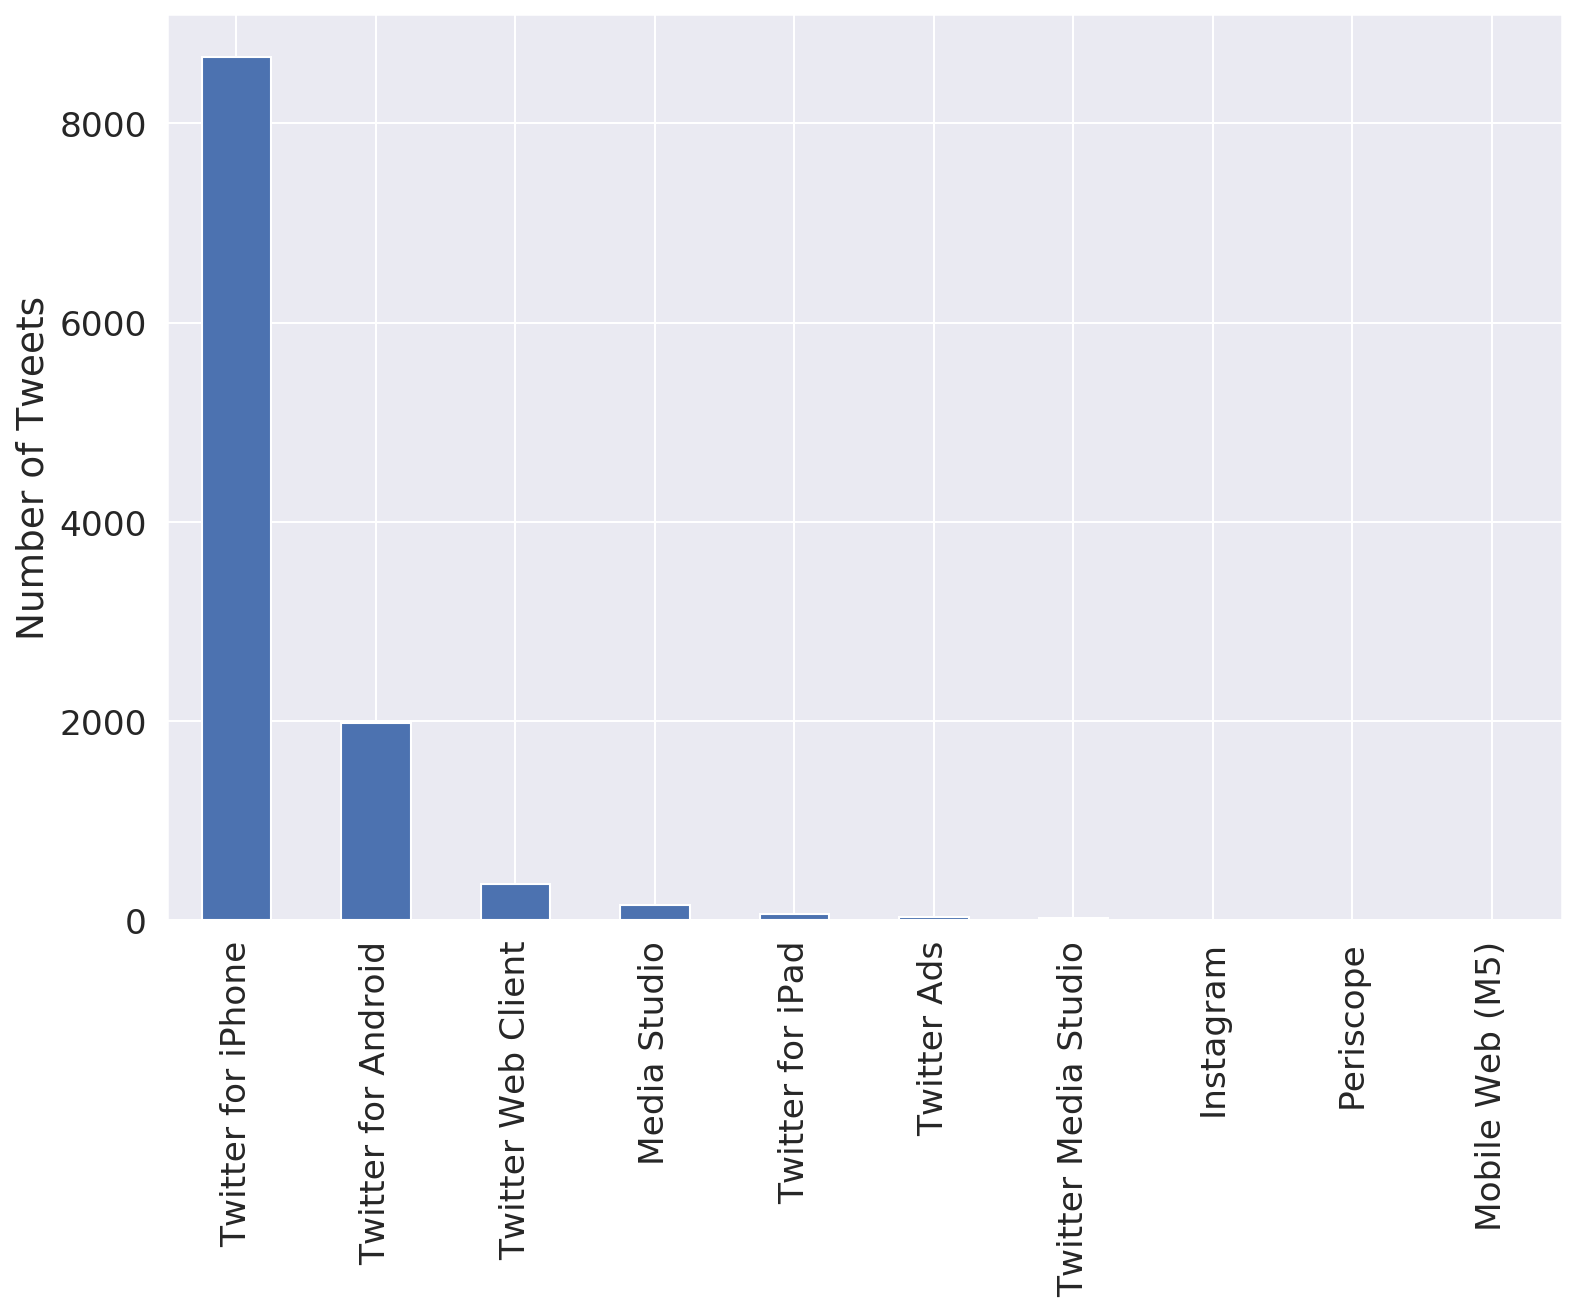

In [26]:
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
q2a_gca = plt.gca();

In [27]:
# TEST

heights = [int(rect.get_height()) for rect in q2a_gca.get_children() if isinstance(rect, matplotlib.patches.Rectangle)]
assert max(heights) == max(trump['source'].value_counts().values)


### Question 2b

Is there a difference between his Tweet behavior across these devices? Maybe Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets). We see the `+0000` in the `time` column.

Add a column `est_time` by converting from UTC to EST timezone. Use `trump['time'].dt.tz_convert("US/Eastern")`. See Lab 7 for more information about time zones.


In [28]:
# Convert to Eastern Time

trump['est_time'] = trump['time'].dt.tz_convert("EST")

# YOUR CODE HERE
#raise NotImplementedError()

In [29]:
# TEST 

assert str(trump["est_time"].dt.tz) == "EST"

Now add a column called `hour` to the `trump` table. The colum should contain the hour of the day as floating point number computed by:

 $$\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2} $$

In [30]:
trump['hour'] = (trump['est_time'].dt.hour) + (trump['est_time'].dt.minute)/60 + (trump['est_time'].dt.second)/60**2
trump.head()
# YOUR CODE HERE
#raise NotImplementedError()

,time,text,source,retweet_count,est_time,hour
id,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"""@bigop1: @realDonaldTrump @SarahPalinUSA htt...",Twitter for Android,1059,2016-01-21 08:56:11-05:00,8.936389
690171403388104704,2016-01-21 13:57:39+00:00,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Re...",Twitter for Android,1339,2016-01-21 08:57:39-05:00,8.960833
690173226341691392,2016-01-21 14:04:54+00:00,So sad that @CNN and many others refused to sh...,Twitter for Android,2006,2016-01-21 09:04:54-05:00,9.081667
690176882055114758,2016-01-21 14:19:26+00:00,Sad sack @JebBush has just done another ad on ...,Twitter for Android,2266,2016-01-21 09:19:26-05:00,9.323889
690180284189310976,2016-01-21 14:32:57+00:00,Low energy candidate @JebBush has wasted $80 m...,Twitter for Android,2886,2016-01-21 09:32:57-05:00,9.549167


In [31]:
# TEST
assert max(trump['hour']) > 23
assert sum(trump['hour'] < 0) == 0


### Question 2c

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.


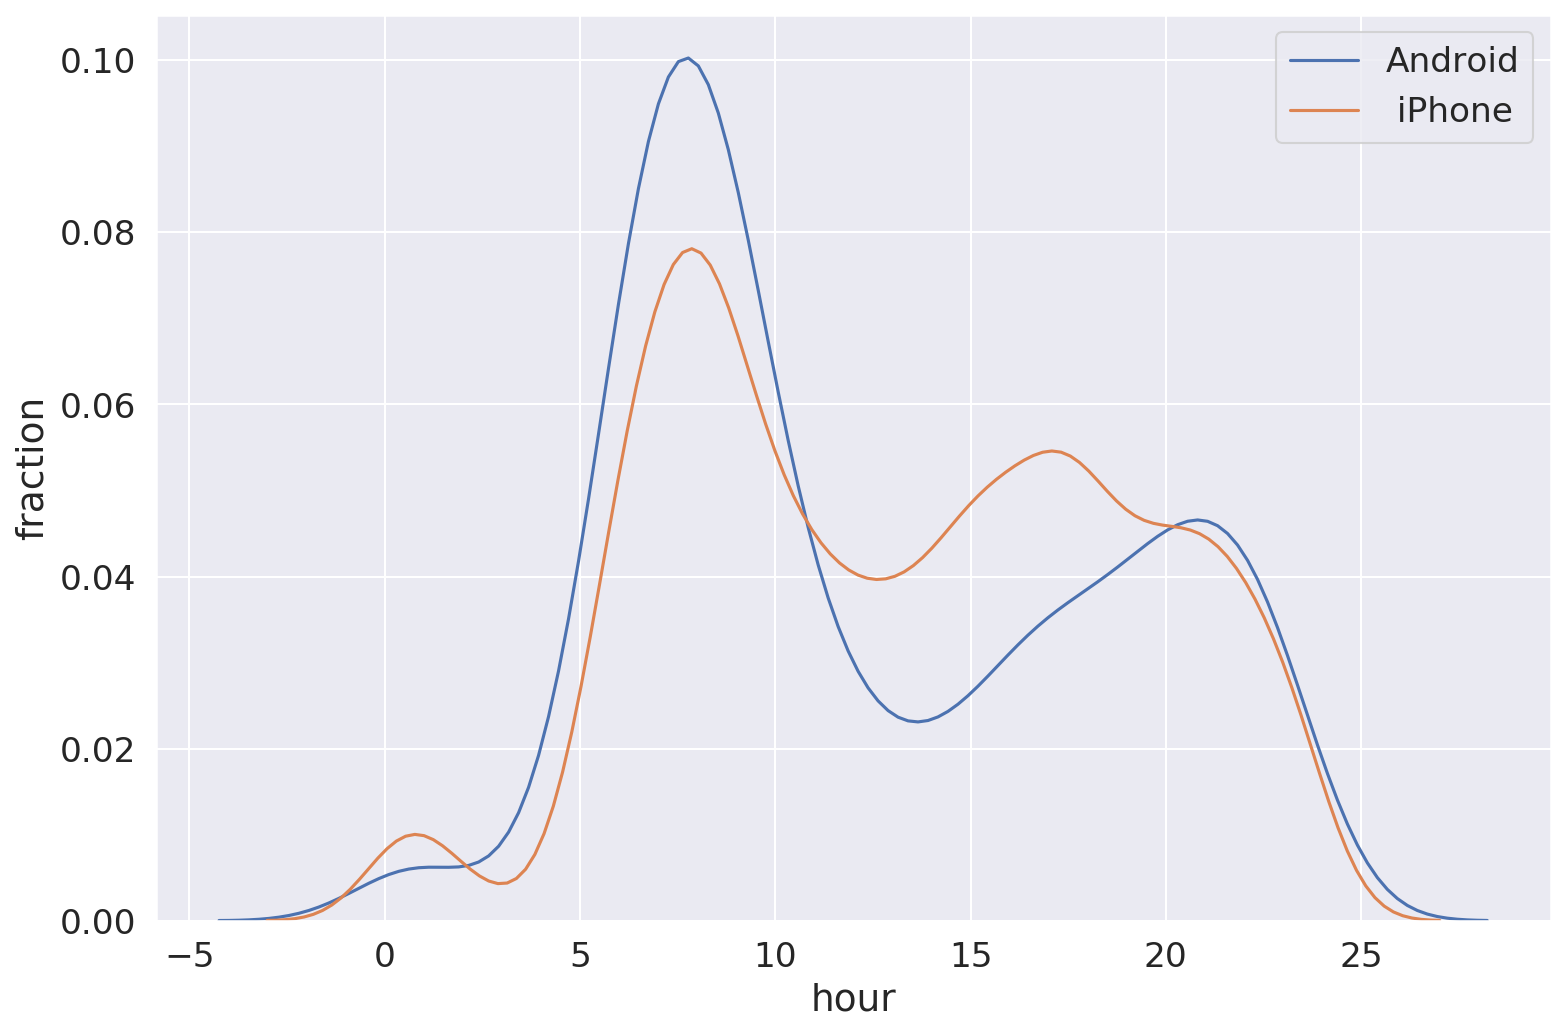

In [32]:
top_devices = trump['source'].value_counts().sort_values()[-2:].index.values

for device in top_devices:
    series = trump[trump['source'] == device]['hour']
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    sns.distplot(series, hist=False, label = device[-7:] )    
    
plt.xlabel('hour')
plt.ylabel('fraction')
plt.legend()
q2c_gca = plt.gca();

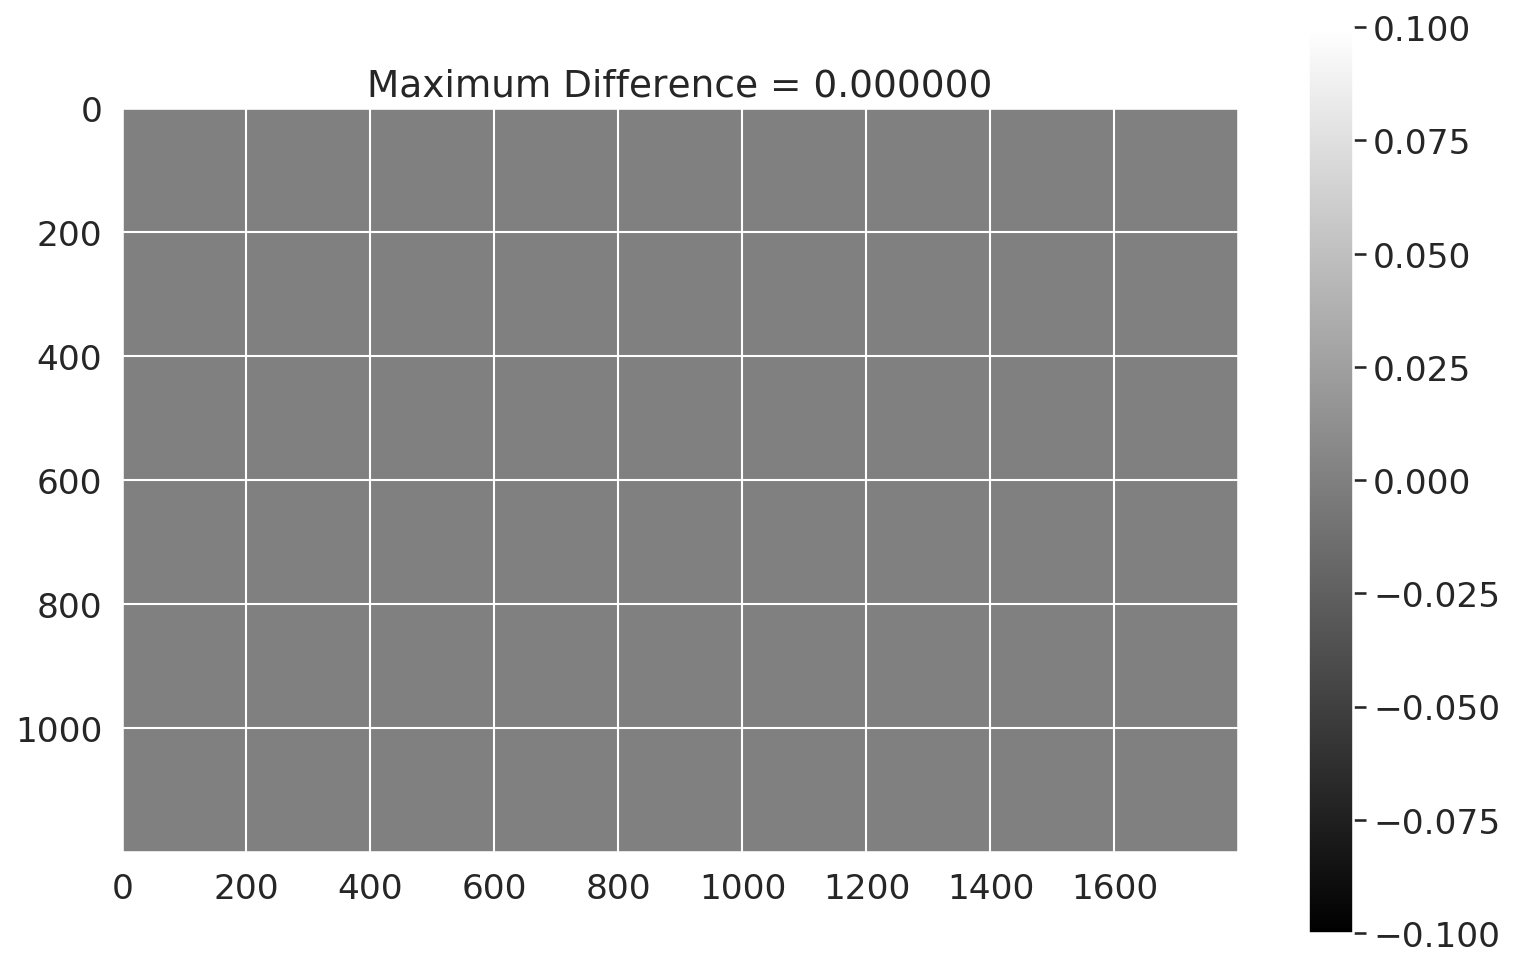

In [33]:
# TEST 

with open(f"{home_path}/shared/Project1/data/image.pickle", "br") as fh:
    q2c_gca_benchmark = pickle.load(fh)

curves = dsua_112_utils.get_curves(q2c_gca)
benchmark_curves = dsua_112_utils.get_curves(q2c_gca_benchmark)

diff = dsua_112_utils.generate_normalized_difference(q2c_gca_benchmark, curves["Android"], benchmark_curves['Android'])
dsua_112_utils.compare_curves(diff)



### Question 2d

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 4c, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support to this theory?

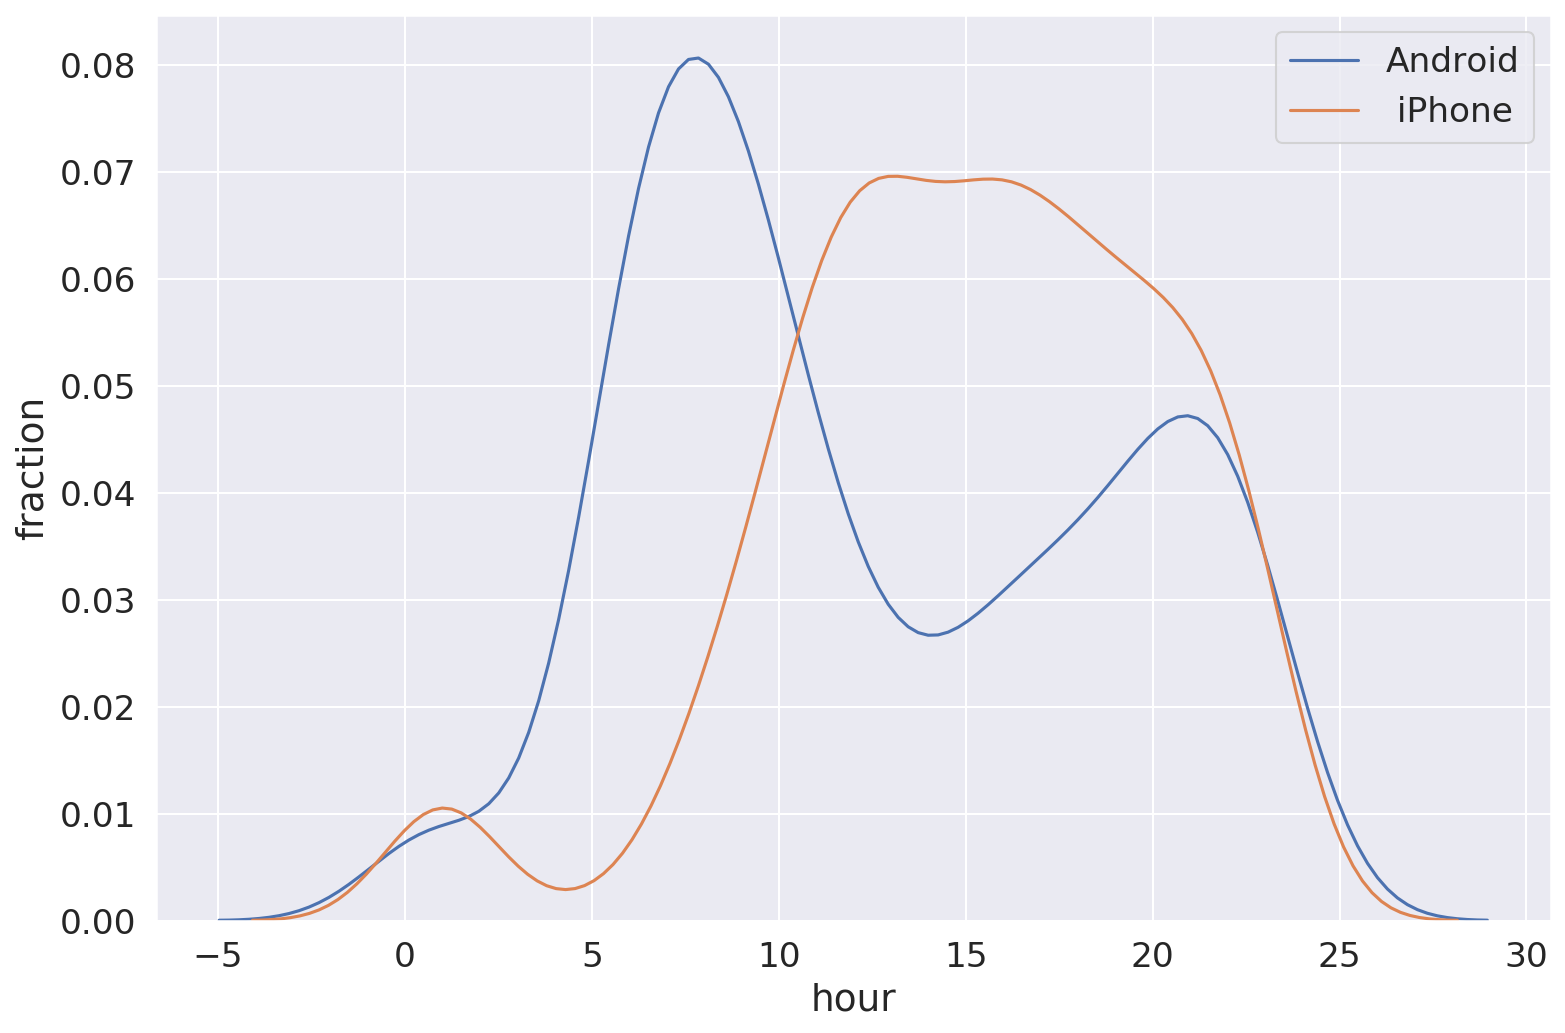

In [34]:
top_devices = trump['source'].value_counts().sort_values()[-2:].index.values
trump['year'] = trump['time'].apply(dsua_112_utils.year_fraction).round()

for device in top_devices:
    series = trump[(trump['source'] == device) & (trump['year'] == 2016.0)]['hour']
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    sns.distplot(series, hist=False, label = device[-7:] )    
    
plt.xlabel('hour')
plt.ylabel('fraction')
plt.legend()
q2d_gca = plt.gca();

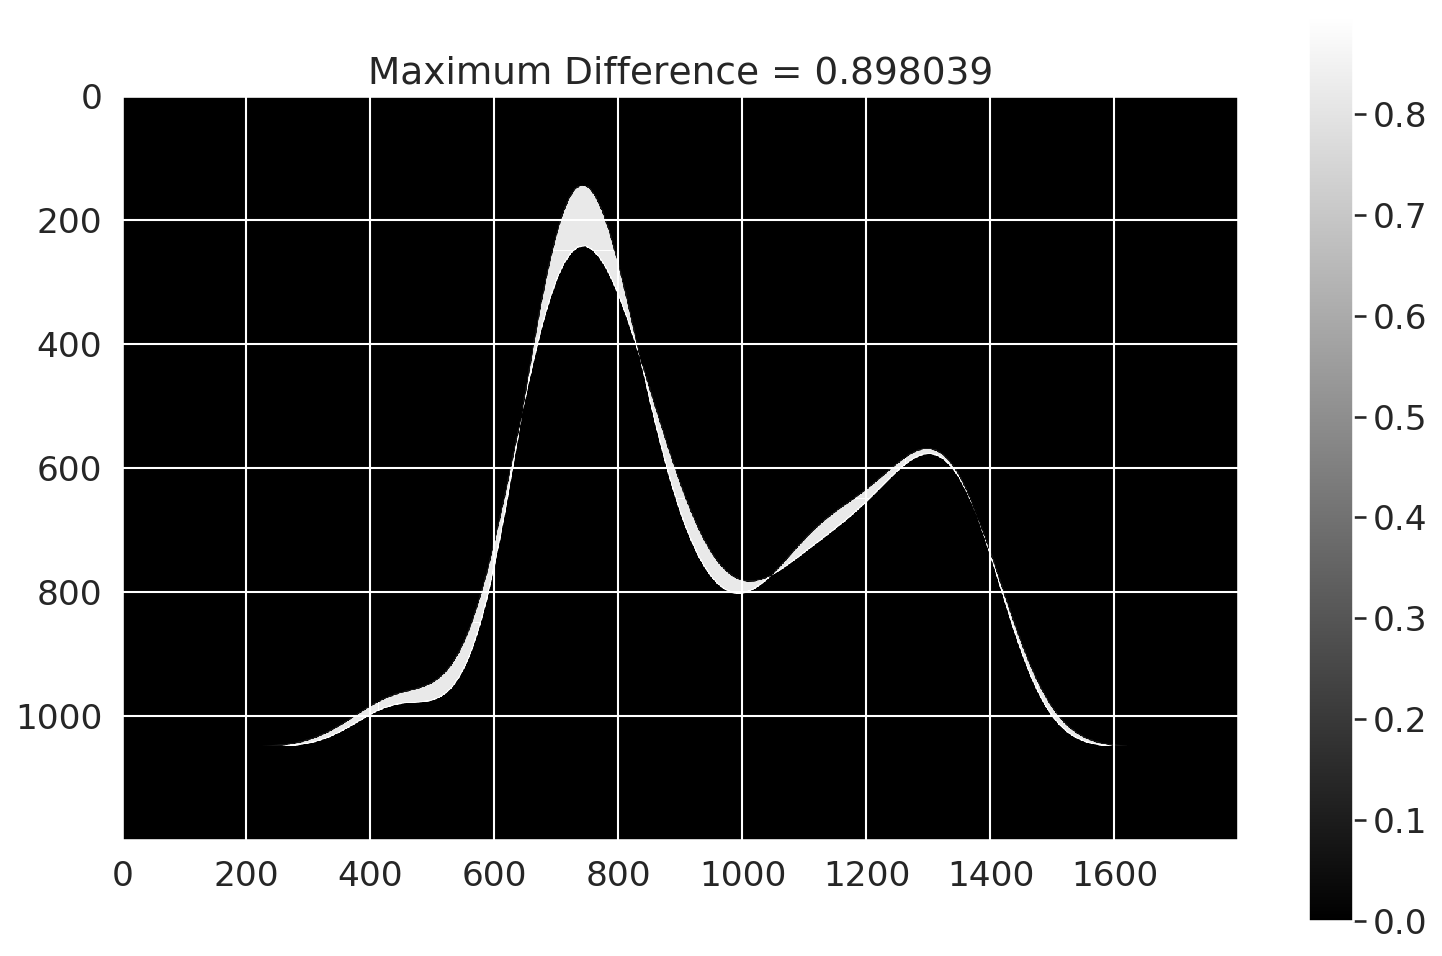

In [35]:
# TEST 

with open(f"{home_path}/shared/Project1/data/image1.pickle", "br") as fh:
    q2d_gca_benchmark = pickle.load(fh)

curves = dsua_112_utils.get_curves(q2d_gca)
benchmark_curves = dsua_112_utils.get_curves(q2d_gca_benchmark)

diff = dsua_112_utils.generate_normalized_difference(q2d_gca_benchmark, curves["Android"], benchmark_curves['Android'])
dsua_112_utils.compare_curves(diff)


### Question 2e

Which device did Donald Trump use between 2016-2018 in this dataset. To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution. We will use the `year_fraction` function in the supporting code for the assignment



In [36]:
trump['year'] = trump['time'].apply(dsua_112_utils.year_fraction)

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies between before 2019. 


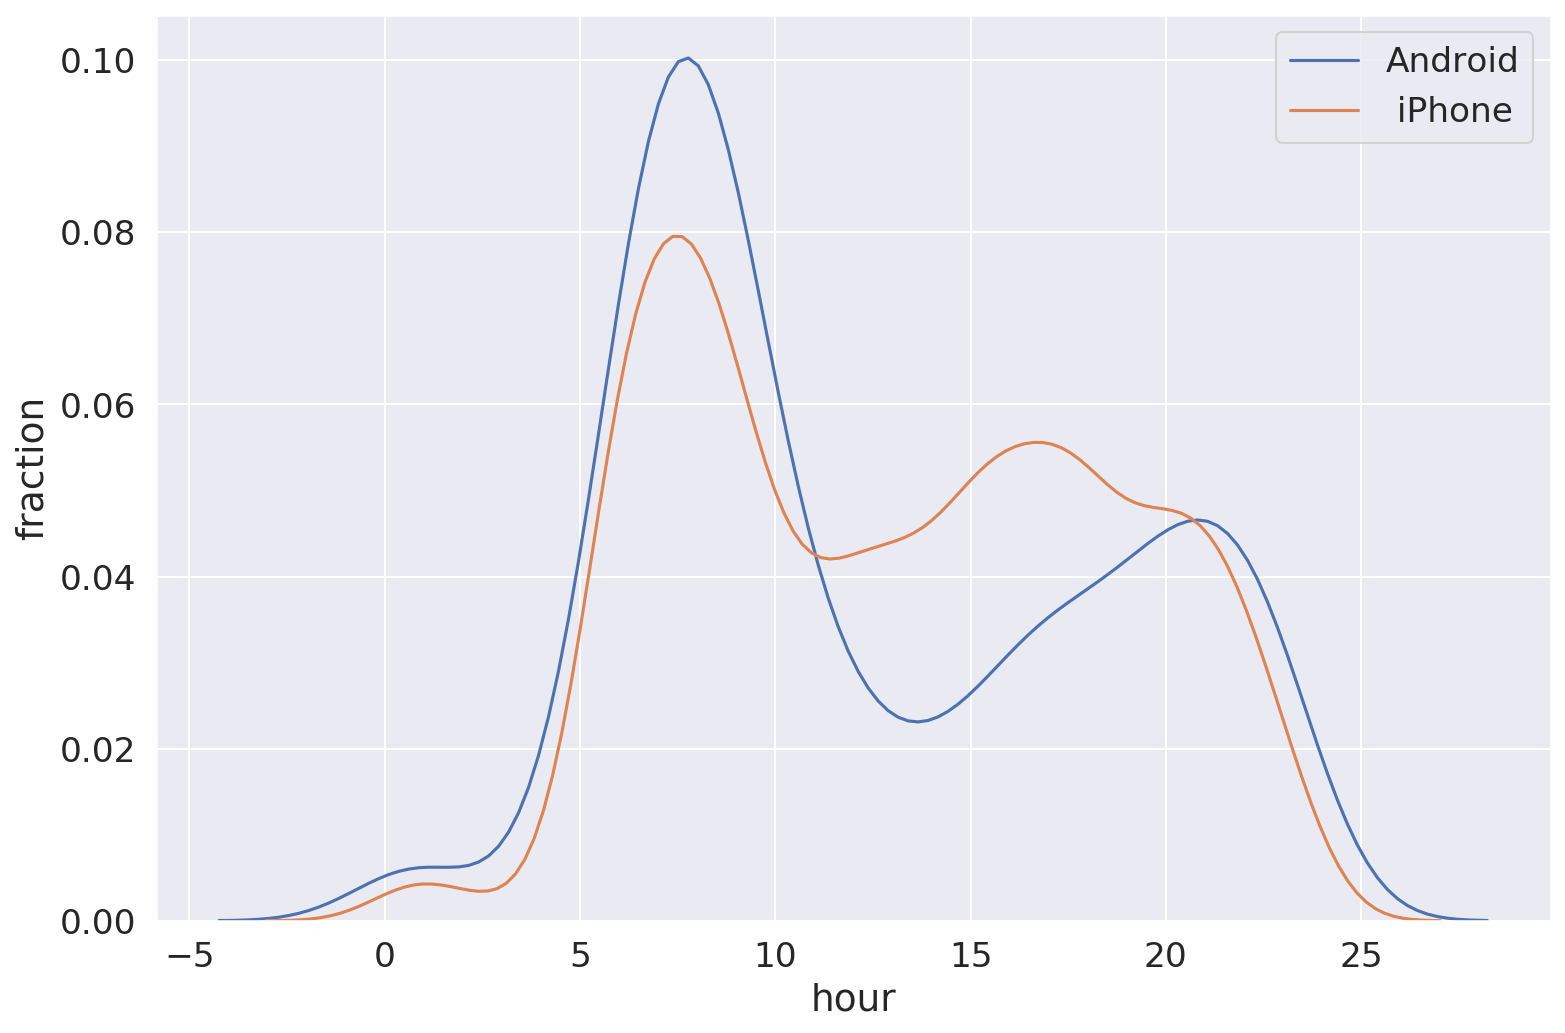

In [37]:
top_devices = trump['source'].value_counts().sort_values()[-2:].index.values

for device in top_devices:
    series = trump[(trump['source'] == device) & (trump['year'] < 2019)]['hour']
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    sns.distplot(series, hist=False, label = device[-7:] )    
    
plt.xlabel('hour')
plt.ylabel('fraction')
plt.legend()
q2e_gca = plt.gca();

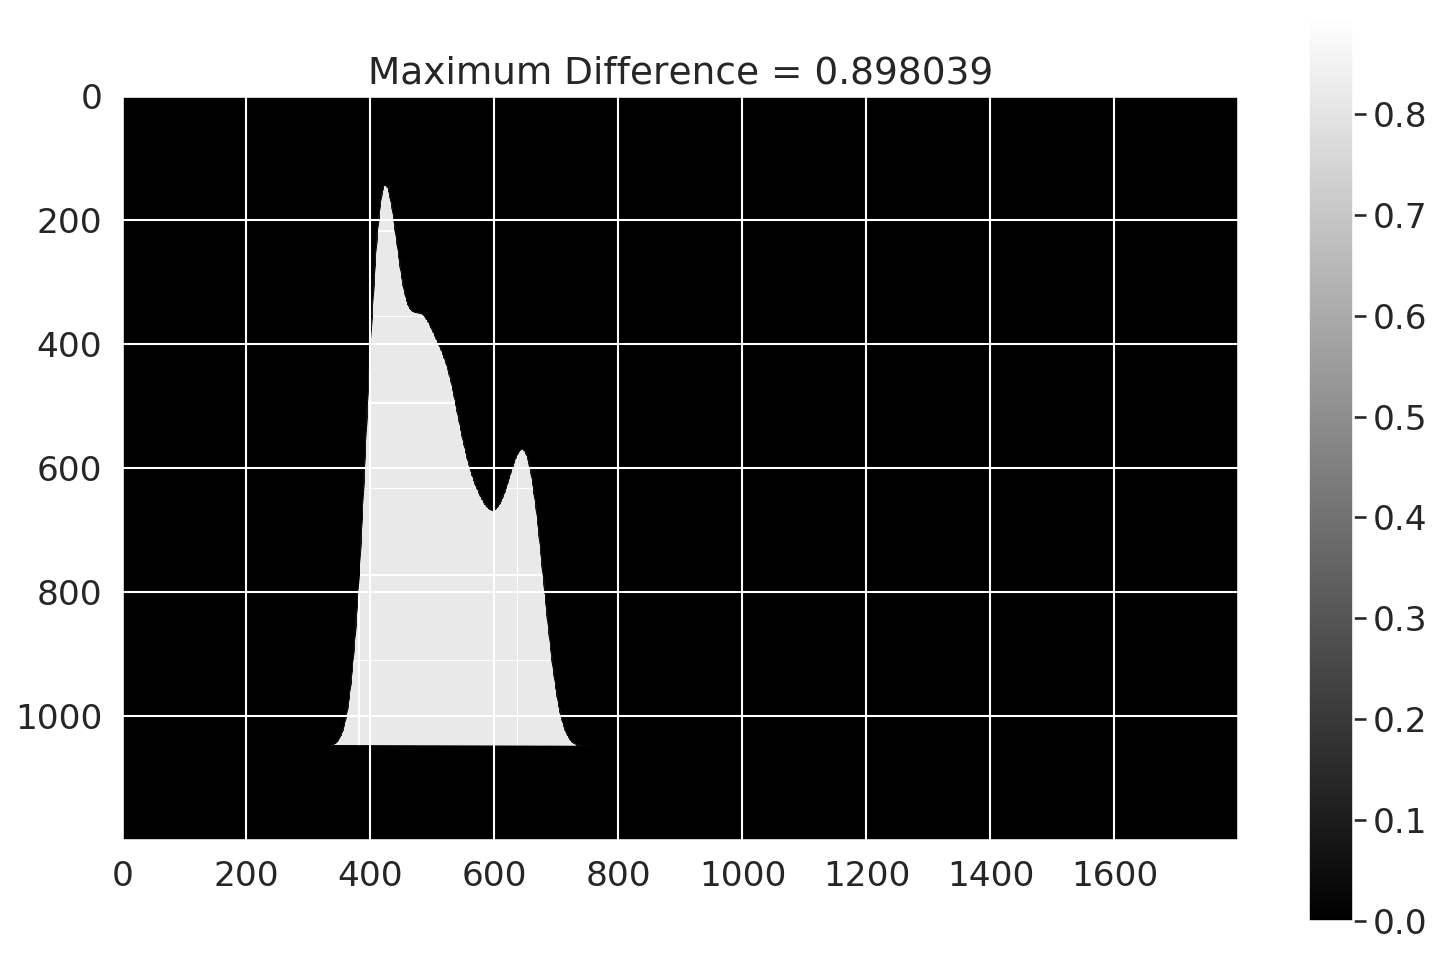

In [38]:
# TEST 

with open(f"{home_path}/shared/Project1/data/image2.pickle", "br") as fh:
    q2e_gca_benchmark = pickle.load(fh)

curves = dsua_112_utils.get_curves(q2e_gca)
benchmark_curves = dsua_112_utils.get_curves(q2e_gca_benchmark)

diff = dsua_112_utils.generate_normalized_difference(q2e_gca_benchmark, curves["Android"], benchmark_curves['Android'])
dsua_112_utils.compare_curves(diff)


### Question 3: Sentiment Analysis

We can try to understand the sentiment behind the words in Trump's posts. For example, the sentence "I love America!" has positive sentiment. However, the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

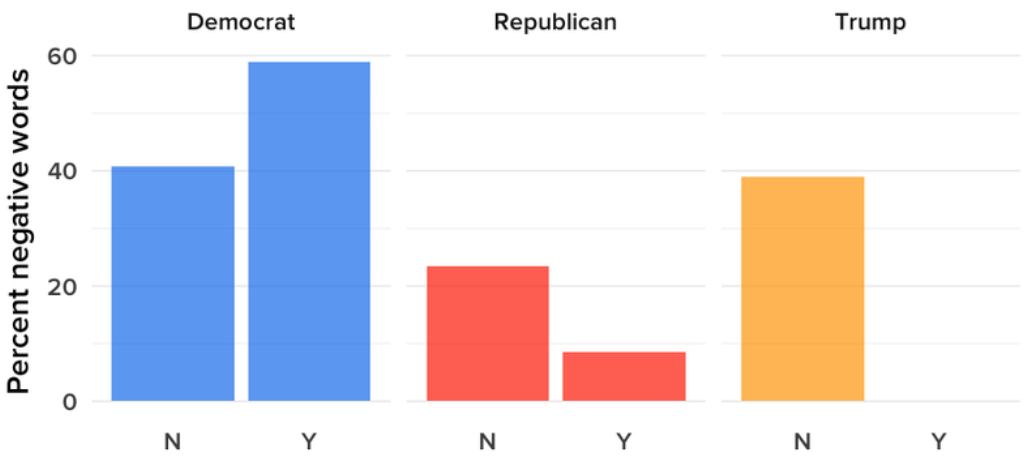

In [39]:
Image(filename=img_path + '/sentiment.PNG', embed=True, width=1000)

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically useful for sentiments in social media. The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [40]:
with open(lexicon_path) as fh:
    print(''.join(fh.readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]




Note that the lexicon contains contains words along with abbreviations, slang and emojis. Since some words can appear as abbreviations, the lexicon does include some duplication depending on context. For example, `lol` appears as both a word and abbreviation with sentiment. 

- The first column of the lexicon is the *token* meaning the word itself. 
- The second column is the *polarity* of the word meaning how positive / negative.  
- The third columns is the standard deviation of the polarity
- The fourth column are 10 raw scores determined by the annotators

See the [documentation](https://github.com/cjhutto/vaderSentiment) for more information.


### Question 3a

Use `pd.read_csv` to load the lexicon into a DataFrame called `sent`. 

- The index should be the tokens in the lexicon. 
- The table should have one column containing the polarity
- The delimiter is `\t` not `,` so you need to set `sep = \t`

In [41]:
path_to_use_for_sent = lexicon_path

sent = pd.read_csv(path_to_use_for_sent, sep = '\t', header = None )
sent = sent.rename(columns = {1:'polarity', 0 : 'token', 2:'standard dev', 3: 'raw scores'})
sent = sent.set_index('token')
sent.head()
# YOUR CODE HERE
#raise NotImplementedError()

,polarity,standard dev,raw scores
token,,,
$:,-1.5,0.80623,"[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]"
%),-0.4,1.01980,"[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]"
%-),-1.5,1.43178,"[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]"
&-:,-0.4,1.42829,"[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]"
&:,-0.7,0.64031,"[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]"


In [42]:
#TEST

assert np.allclose(sent['polarity'].head(), [-1.5, -0.4, -1.5, -0.4, -0.7])



### Question 3b

We want to use the lexicon to calculate the overall sentiment for each of Trump's tweets:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` to be the lowercase text of each tweet.

In [43]:
# YOUR CODE HERE
trump['text'] = trump['text'].str.lower()
#raise NotImplementedError()

In [44]:
# TEST 

assert trump.loc[954722155463430145,"text"] == 'democrats are holding our military hostage over their desire to have unchecked illegal immigration. can’t let that happen!'


### Question 3c

We need to get rid of punctuation. Otherwise we won't match words in the lexicon. Create a new column called `no_punc` in`trump` to be the lowercase text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. Remember that

- The special character `\w` denotes letters and numbers 
- The special character `\s` denotes space



In [45]:
# Save your regex in punct_re
punct_re = r'[^\w\s]'
trump['no_punc'] =  trump['text'].str.replace(punct_re, ' ')
trump.head()
# YOUR CODE HERE
#raise NotImplementedError()

,time,text,source,retweet_count,est_time,hour,year,no_punc
id,,,,,,,,
690171032150237184,2016-01-21 13:56:11+00:00,"""@bigop1: @realdonaldtrump @sarahpalinusa htt...",Twitter for Android,1059,2016-01-21 08:56:11-05:00,8.936389,2016.054645,bigop1 realdonaldtrump sarahpalinusa htt...
690171403388104704,2016-01-21 13:57:39+00:00,"""@americanaspie: @glennbeck @sarahpalinusa re...",Twitter for Android,1339,2016-01-21 08:57:39-05:00,8.960833,2016.054645,americanaspie glennbeck sarahpalinusa re...
690173226341691392,2016-01-21 14:04:54+00:00,so sad that @cnn and many others refused to sh...,Twitter for Android,2006,2016-01-21 09:04:54-05:00,9.081667,2016.054645,so sad that cnn and many others refused to sh...
690176882055114758,2016-01-21 14:19:26+00:00,sad sack @jebbush has just done another ad on ...,Twitter for Android,2266,2016-01-21 09:19:26-05:00,9.323889,2016.054645,sad sack jebbush has just done another ad on ...
690180284189310976,2016-01-21 14:32:57+00:00,low energy candidate @jebbush has wasted $80 m...,Twitter for Android,2886,2016-01-21 09:32:57-05:00,9.549167,2016.054645,low energy candidate jebbush has wasted 80 m...


In [46]:
#TEST
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None

assert trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Question 3d:


We should convert the tweets into a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). Changing the format will help us to analyze the sentiments.  Use the `no_punc` column of `trump` to create a table called `tidy_format`. 

1. The index should be the `id` repeated once for every word in the tweet
1. The first column should be called `num`. It should give the location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
1. The second column should be called `word`. It should give the individual words of each tweet.

Some rows of `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

Since we should avoid using loops, we will take advantage of `pandas` methods. We will take three steps. 

First we use a string method called `split` that breaks the words across different columns.

In [47]:
# Step 1

no_punc_split = trump["no_punc"].str.split(expand = True)

no_punc_split.head()

,0,1,2,3,4,5,6,...,87,88,89,90,91,92,93
id,,,,,,,,,,,,,,,
690171032150237184,bigop1,realdonaldtrump,sarahpalinusa,https,t,co,3kyqgqevyd,...,None,None,None,None,None,None,None
690171403388104704,americanaspie,glennbeck,sarahpalinusa,remember,when,glenn,gave,...,None,None,None,None,None,None,None
690173226341691392,so,sad,that,cnn,and,many,others,...,None,None,None,None,None,None,None
690176882055114758,sad,sack,jebbush,has,just,done,another,...,None,None,None,None,None,None,None
690180284189310976,low,energy,candidate,jebbush,has,wasted,80,...,None,None,None,None,None,None,None


Second we use a method called `melt`. Remember that we discussed `melt` in Week 6 lecture.

In [48]:
# Step 2

numbered_columns = no_punc_split.columns.values
no_punc_split.reset_index(inplace = True)

tidy_format = pd.melt(no_punc_split, id_vars=['id'], value_vars=numbered_columns)

tidy_format.head()

,id,variable,value
0,690171032150237184,0,bigop1
1,690171403388104704,0,americanaspie
2,690173226341691392,0,so
3,690176882055114758,0,sad
4,690180284189310976,0,low


Third we need to 

- Rename `variable` column to `num`
- Rename `value` column to `word`
- Drop any rows with missing values
- Sort by `['id','variable']`
- Set index to be the `id` column

In [49]:
# Step 3
tidy_format = tidy_format.rename(columns = {'variable' : 'num', 'value' : 'word'})
tidy_format = tidy_format.dropna()
tidy_format = tidy_format.sort_values(['id', 'num'])
tidy_format = tidy_format.set_index('id')
# YOUR CODE HERE
#raise NotImplementedError()

In [50]:
#TEST
assert tidy_format.loc[894661651760377856].shape == (27, 2)


### Question 3e:

Now that we have changed the format, we can study the sentiment of each tweet. In particular, we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

- Take a left join of `tidy_format` and `sent`
- Fill missing values with 0 

In [51]:
tidy_format_sent_merged = tidy_format.merge(sent, how = 'left', left_on = 'word', right_index = True)
tidy_format_sent_merged = tidy_format_sent_merged.loc[:, ['num', 'word', 'polarity']]
tidy_format_sent_merged = tidy_format_sent_merged.fillna(0)
tidy_format_sent_merged.head()
# YOUR CODE HERE
#raise NotImplementedError()

,num,word,polarity
id,,,
690171032150237184,0,bigop1,0.0
690171032150237184,1,realdonaldtrump,0.0
690171032150237184,2,sarahpalinusa,0.0
690171032150237184,3,https,0.0
690171032150237184,4,t,0.0


In [52]:
# TEST 

assert tidy_format_sent_merged["polarity"].isna().sum() == 0
assert set(tidy_format_sent_merged.columns.values).issubset({"polarity", "word", "num"})

Group `tidy_format_sent_merged` by `id`. Use `agg` on the `polarity` column with the `sum` function to add the numbers for each post. 

In [53]:
grouped_tidy_format_sent_merged = tidy_format_sent_merged.groupby('id').agg(sum)
grouped_tidy_format_sent_merged
tidy_format_sent_merged.groupby('id').agg({'polarity':'sum'})
trump['polarity'] = tidy_format_sent_merged.groupby('id').agg({'polarity':'sum'})
#trump.head()
# YOUR CODE HERE
#raise NotImplementedError()
trump.loc[744701872456536064]

time                                     2016-06-20 01:22:16+00:00
text             .@djohnsonpga we are so proud of you dustin. y...
source                                         Twitter for Android
retweet_count                                                 5444
est_time                                 2016-06-19 20:22:16-05:00
hour                                                       20.3711
year                                                       2016.47
no_punc            djohnsonpga we are so proud of you dustin  y...
polarity                                                       8.4
Name: 744701872456536064, dtype: object

In [54]:
#TEST
assert np.allclose(trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(trump.loc[744519497764184064, 'polarity'], 1.7)
# If you fail this test, you dropped tweets with 0 polarity
assert np.allclose(trump.loc[744355251365511169, 'polarity'], 0.0)


Now we have a measure of the sentiment of each of his tweets. Run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [55]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak and.....

   ....what right does crazy nancy have to hold up this senate trial. none! she has a bad case and would rather not have a negative

In [56]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   95% approval rating in the republican party. thank you! 191 federal judges (a record), and two supreme court justices, approved. best economy &amp; employment numbers ever. thank you to our great new, smart and nimble republican party. join now, it’s where people want to be!

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new po

### Question 3f

Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  You should obtain a chart like the followig.

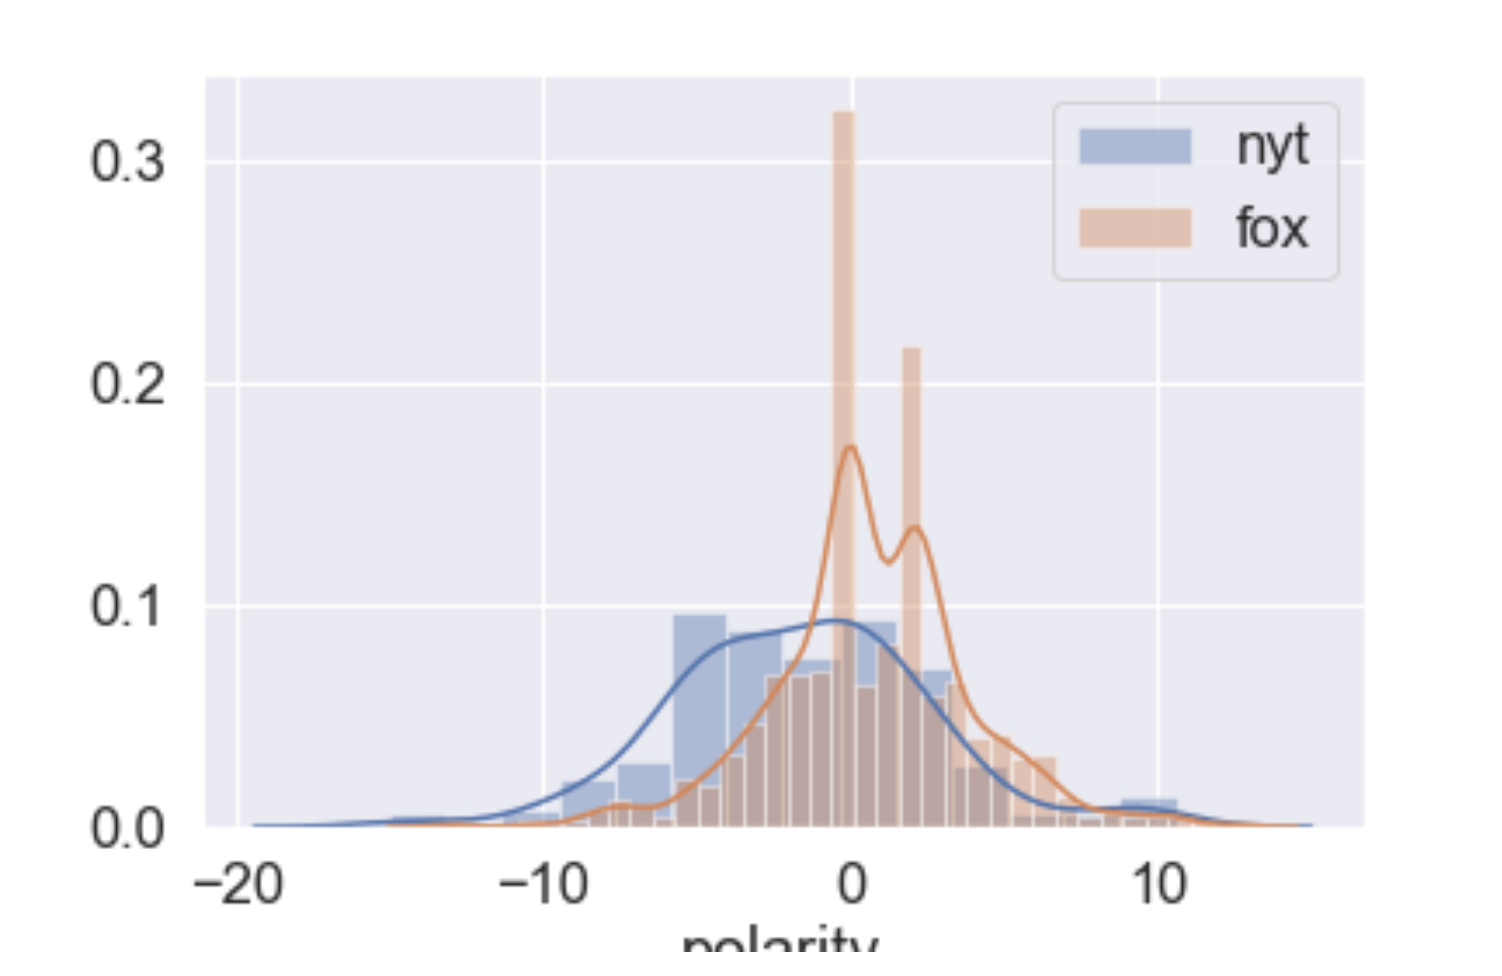

In [57]:
Image(filename=img_path + '/news.PNG', embed=True, width=750)

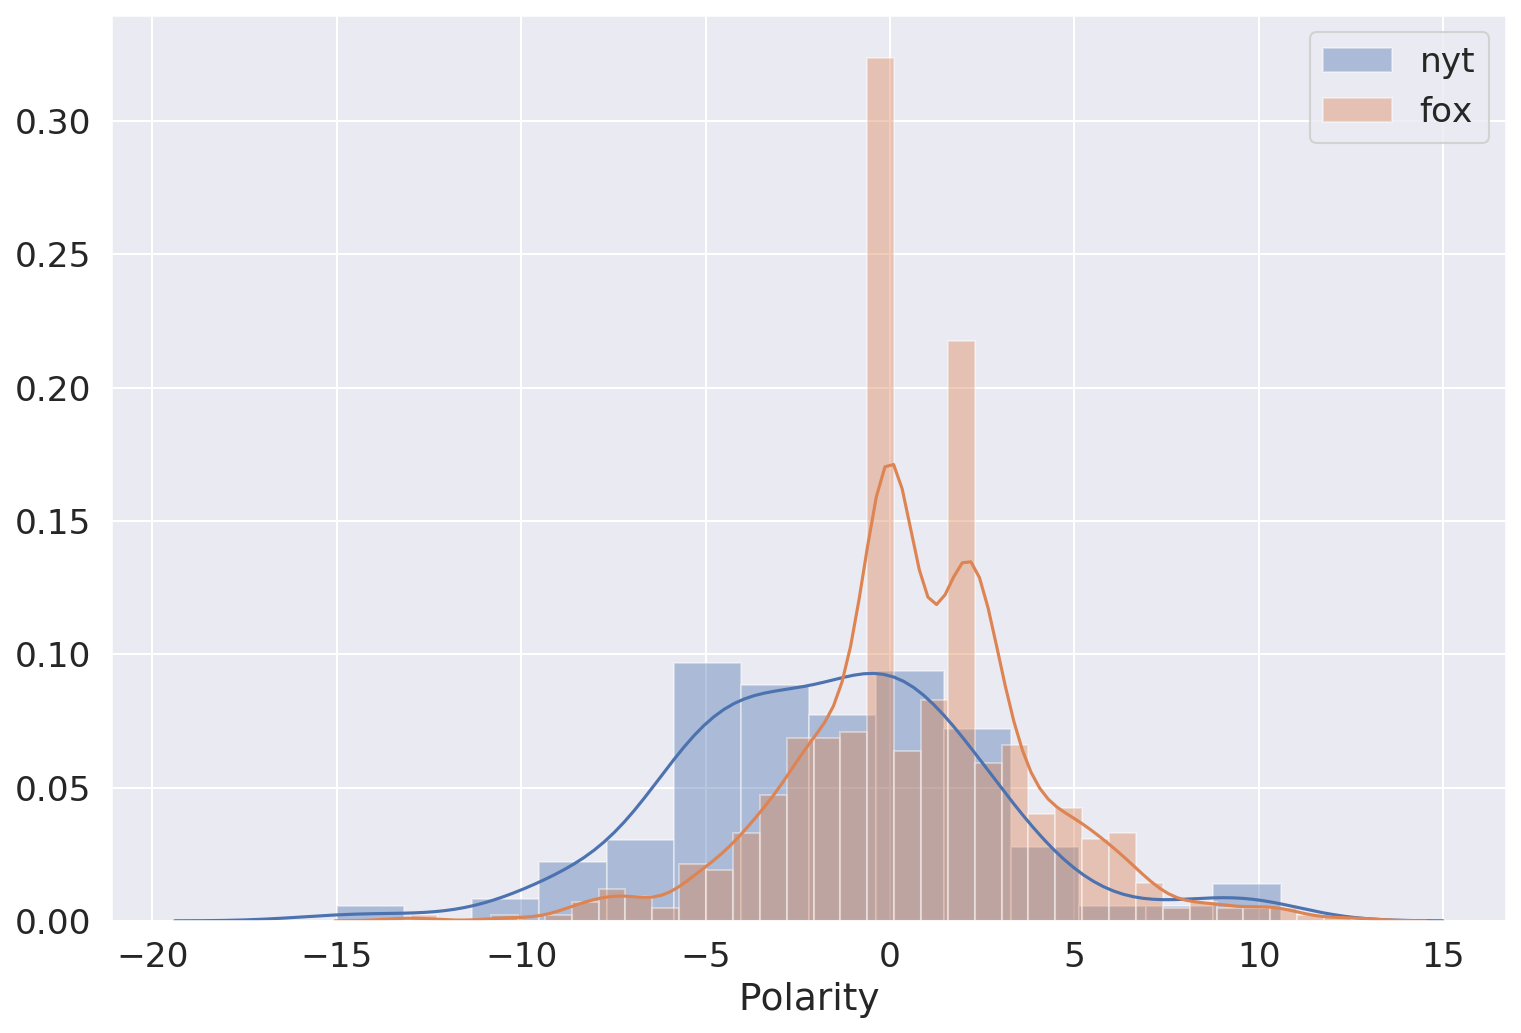

In [58]:
keywords = ["nyt","fox"]

for keyword in keywords:
    series = trump[trump['text'].str.contains(keyword)]['polarity']
    # YOUR CODE HERE
    #raise NotImplementedError()
    sns.distplot(series, hist=True, label = keyword )    
    
plt.xlabel('Polarity')

plt.legend()
q3f_gca = plt.gca();

In [59]:
# TEST 

heights = [rect.get_height() for rect in q3f_gca.get_children() if isinstance(rect,matplotlib.patches.Rectangle)]

assert np.isclose(sorted(heights)[-2], 0.32, atol = 1e-1)


### Question 4: Engagement

We want to understand the posts that led to many retweets. If a post was retweeted, then a follow of Donald Trump copied the post to a different user. The keywords in these posts should indicate topics of interests 

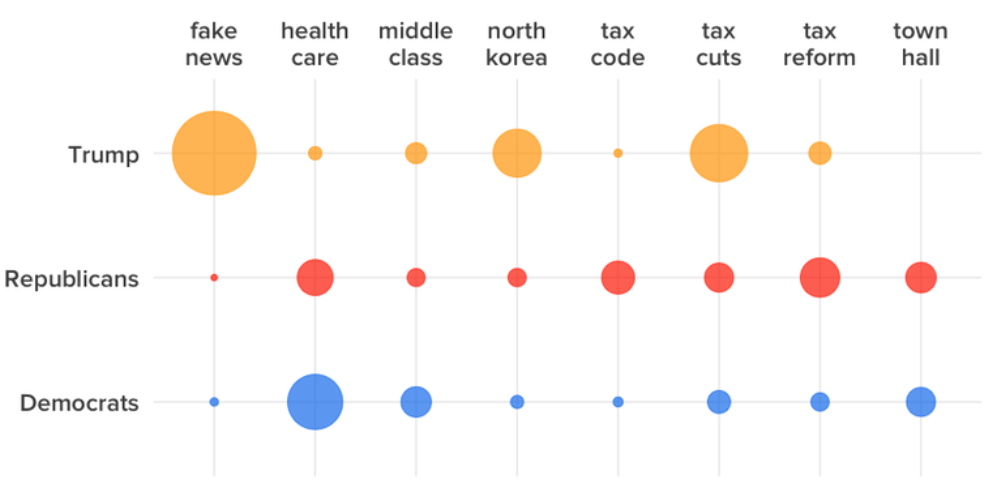

In [60]:
Image(filename=img_path + '/keywords.PNG', embed=True, width=750)

### Question 4a

We will determine the words that led to many retweets on average. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.

We will take four steps to find the 20 most retweeted words. We will include only words that appear in at least 25 tweets. The format of `top_20` table will be

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40592.833333</td>
    </tr>
    <tr>
      <th>क</th>
      <td>37918.307692</td>
    </tr>
    <tr>
      <th>iranian</th>
      <td>32982.000000</td>
    </tr>
     <tr>
      <th>un</th>
      <td>32677.024390</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32237.306122</td>
    </tr>
  </tbody>
</table>


Note that the table will contain some words outside of the Latin alphabet. Surrounding a visit to India, some posts include characters from Devanagari a block of Unicode containing alphabets such as Hindi.




First, we can use the `tidy_format_sent_merged` table from Question 3 to study the words in each post. Joining with the `retweet_count` column of `trump` gives us the number of retweets of the post for each word in the post. 


In [61]:
# Step 1 

retweets = pd.merge(left = trump[["retweet_count"]], 
                    right = tidy_format_sent_merged, 
                    left_index = True, 
                    right_index = True, 
                    how = "left")

Second group `retweets` by `word`. Use filter to remove any words that appear fewer than 25 times. 

In [62]:
# Step 2

retweets_filtered = retweets.groupby('word').filter(lambda x : len(x) >=25)

retweets_filtered
# YOUR CODE HERE
#raise NotImplementedError()

,retweet_count,num,word,polarity
id,,,,
690171032150237184,1059,1,realdonaldtrump,0.0
690171032150237184,1059,3,https,0.0
690171032150237184,1059,4,t,0.0
690171032150237184,1059,5,co,0.0
690171403388104704,1339,3,remember,0.0
...,...,...,...,...
1235797615041753088,2910,7,last,0.0
1235797615041753088,2910,8,night,0.0
1235797615041753088,2910,9,https,0.0


In [63]:
# TEST 

assert retweets_filtered.groupby("word").size().min() > 24

Third group `retweets_filtered` by `word`. We can use `agg` to compute the average of the `retweet_count` column in each group.

In [64]:
# Step 3

retweets_average = retweets_filtered.groupby('word').agg({'retweet_count':'mean'})
retweets_average.head()
# YOUR CODE HERE
#raise NotImplementedError()

,retweet_count
word,
00,10293.675676
000,17666.538835
1,13649.312883
10,13975.564103
100,15236.175439


In [65]:
# TEST 

assert retweets_average.index.name == "word"
assert retweets_average.columns.values == ["retweet_count"]

Now that we have the average number of retweets in `retweets_average`, use `sort_values` to determine the top 20. 

In [66]:
# Step 4

top_20 = retweets_average.sort_values(by=['retweet_count'], ascending = False)
top_20 = top_20[0:20]
top_20
# YOUR CODE HERE
#raise NotImplementedError()

,retweet_count
word,
jong,40592.833333
क,37918.307692
iranian,32982.000000
un,32677.024390
kim,32237.306122
try,29877.121212
players,29442.806452
powerful,29325.517241
maybe,29056.066667


In [67]:
#TEST
assert 'iran'     in top_20.index
assert 'nuclear' in top_20.index


Here's a bar chart of your results:

/opt/conda/envs/dsua-112/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/dsua-112/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 2325 missing from current font.
  font.load_char(ord(s), flags=flags)


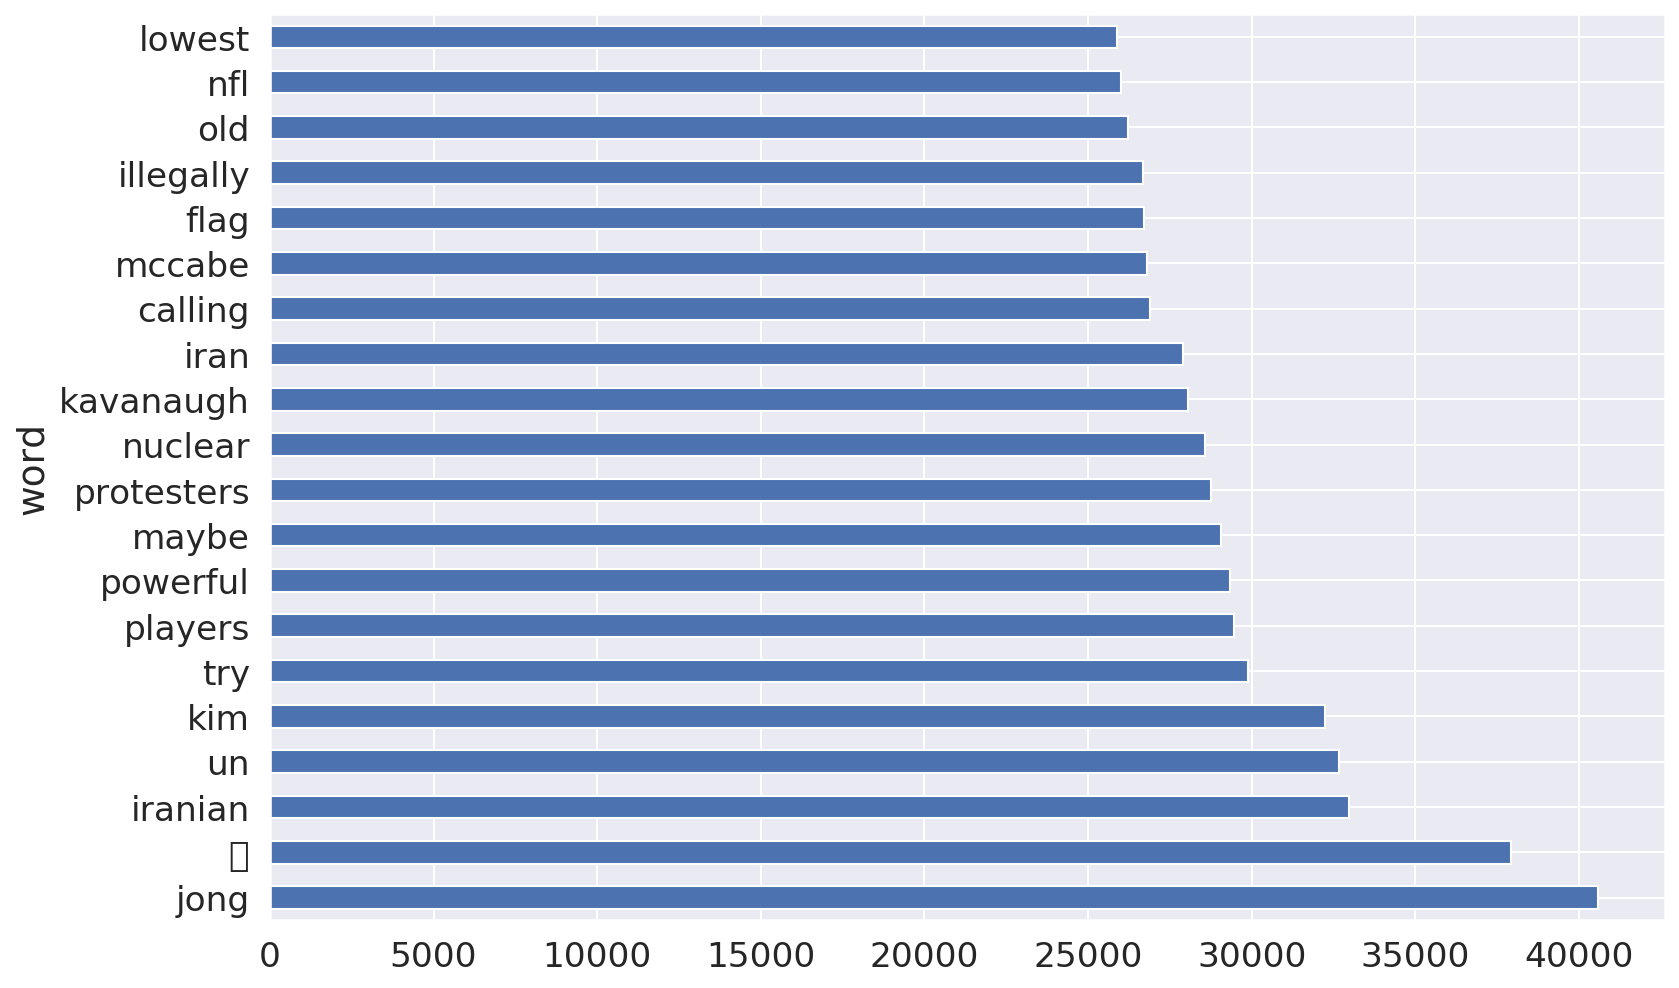

In [68]:
top_20['retweet_count'].plot.barh();

### Question 4b

At some point in time, "kim", "jong" and "un" were popular in Trump's tweets. Can we concludet that tweets involving "jong" are more popular than his other tweets. 

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
1. We didn't account for the fact that Trump's follower count has increased over time.

#### YOUR ANSWER HERE
1) True , filler words will be more frequently in trump's tweets and also occur most frequently in tweets than non-filler words will, which would have biased our filter of only choosing words that appear 25 times. 
2) False, we removed special characters from tweets such as hashtags. The confounding issue of haing duplicate words in a tweet would not bias our analysis. We filtered on the count of tweets, we chose words that appeared in at leat 25 tweets, that would not be affected by duplicate word counts. 
3) True, we didn't account for trumps following and account for his followers opinions of trump. That may have skewed the popularity of the things he said, his presidency may have increased his following which would affect his retweet count. 
